<a href="https://colab.research.google.com/github/RomanKundriukov/ki/blob/main/MachineLearningMitPython_ipunb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modell Celsius zu Fahrenheit

In [17]:
#!pip install openpyxl

# Import

In [37]:
import tensorflow as tf
import numpy as np
import logging
import os
import pandas as pd
import matplotlib.pyplot as plt

# initialisieren logger


In [2]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Trainings Daten


In [174]:
# mein
tabelle_pfad="./TrainingsData/C&F.xlsx"

df = pd.read_excel(tabelle_pfad)

celcius_q = np.array(df['C'], dtype=float)
fahrenheit_a = np.array(df['F'], dtype=float)

celcius_q_train = celcius_q[:300]
fahrenheit_a_train = fahrenheit_a[:300]

# Testdaten (Labels - ab Index 200)
celcius_q_label = celcius_q[300:]
fahrenheit_a_label = fahrenheit_a[300:]


# Erstellen ein Modell (Dense Layer)

In [175]:
# Modell definieren
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),               # Eingabe-Schicht explizit definiert
    tf.keras.layers.Dense(16, activation='relu'),  # Verborgene Schicht
    tf.keras.layers.Dense(8, activation='relu'),   # Weitere verborgene Schicht
    tf.keras.layers.Dense(1)                       # Ausgabeschicht
])

# Modellübersicht anzeigen
model.summary()

# Modell kompilieren
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Kleinere Lernrate
    loss='mean_squared_error',  # Verlustfunktion
    metrics=['mae']             # Mittlerer absoluter Fehler als zusätzliche Metrik
)

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

# Training des Modells

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 205.2741 - mae: 11.8976 - val_loss: 628.3693 - val_mae: 24.5751
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 212.1108 - mae: 12.1810 - val_loss: 790.9713 - val_mae: 27.6416
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 202.4456 - mae: 11.9746 - val_loss: 367.8108 - val_mae: 18.6824
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 175.2062 - mae: 10.7946 - val_loss: 553.3271 - val_mae: 23.0497
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 187.4231 - mae: 11.4879 - val_loss: 431.6410 - val_mae: 20.3123
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 178.1243 - mae: 11.0840 - val_loss: 671.6412 - val_mae: 25.4700
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 181.1381 - mae: 11.3235 - val_loss: 279.4219 - val_mae: 16.2555
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 178.8089 - mae: 11.2172 - val_loss: 185.7964 - val_mae: 13.1261
Epoch 9/

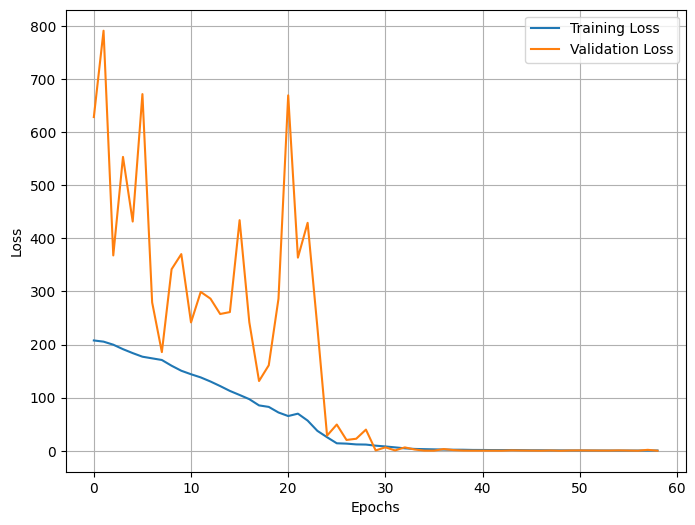

Test Loss: 0.04969349130988121, Test MAE: 0.11256144195795059


In [185]:
#Mein
# Callbacks konfigurieren
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./Modells/C&F.keras',  # Speicherort des besten Modells
        save_best_only=True,            # Speichert nur das beste Modell
        monitor='val_loss',             # Überwache den Validierungsverlust
        mode='min'                      # Minimierung des Loss
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',             # Überwache den Validierungsverlust
        patience=10,                    # Stoppt, wenn sich der Verlust 10 Epochen nicht verbessert
        restore_best_weights=True       # Stellt die besten Gewichte wieder her
    )
]

history = model.fit(
    celcius_q_train, fahrenheit_a_train,
    validation_data=(celcius_q_label, fahrenheit_a_label),
    epochs=500,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

loss, mae = model.evaluate(celcius_q_label, fahrenheit_a_label, verbose=0)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Test des Modells


In [186]:
print(model.predict(np.array([100.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[212.41002]]


# Weights des Modells


In [187]:
print("These are the layer variables: {}".format(model.get_weights()))

These are the layer variables: [array([[ 0.50506335,  0.32663196,  0.57680506, -0.48892394,  0.52910817,
        -0.00541955,  0.656745  ,  0.6380263 , -0.15124975, -0.3292425 ,
        -0.56948394, -0.31615797,  0.38863716, -0.40484616,  0.1305754 ,
         0.16524237]], dtype=float32), array([ 0.74112123,  2.2058465 ,  2.1505277 , -0.22786221,  1.5913905 ,
        2.7215555 ,  1.4619564 ,  2.370709  , -3.335484  , -1.1759828 ,
       -1.5150684 , -0.90670216,  2.8174937 , -1.1921784 ,  2.8025253 ,
        2.6384056 ], dtype=float32), array([[-0.39788213, -0.5589033 , -0.19795796,  0.21585469,  0.1045804 ,
         0.09012474, -0.4372744 ,  0.4730698 ],
       [-0.8242804 ,  0.2958941 , -0.48193422,  0.17054553, -0.04063368,
        -0.49141455, -0.25942868,  0.52680737],
       [-0.07791347,  0.10420145, -0.2749932 , -0.39047673, -0.231282  ,
         0.03319472,  0.13070014,  0.4213156 ],
       [ 0.27588883,  0.32591277,  0.53601646,  0.47543487,  0.01232803,
        -0.49502206, 